<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



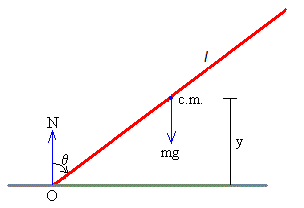


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa de la lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una lápiz de masa $m$ y longitud $l$ respecto a un eje perpendicular a la lápiz en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [33]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

In [160]:
# Condiciones iniciales
theta0 = np.pi / 12  # Ángulo inicial
omega0 = 0  # Velocidad angular inicial
L = 0.1  # Longitud del lápiz en metros
g = 9.81  # Aceleración debida a la gravedad en m/s^2
cond_ini = [theta0, omega0]

# Arreglo de tiempo
dt = 0.001
ti = 0
tfin = 2

N = int((tfin - ti) / dt)
t = np.linspace(ti, tfin, N)

# Definición de la función que describe el sistema
def fun(R, t, g, L):
  theta = R[0]
  omega = R[1]
  n = (2 * g) / L - (omega ** 2) * np.cos(theta)
  d = 1 / 3. + (np.sin(theta)) ** 2
  dTdt = omega  # Diferencial de theta (velocidad angular)
  dOdt = np.sin(theta) * (n / d)  # Diferencial de omega (aceleración angular)
  return np.array([dTdt, dOdt])

# Resolviendo el sistema
solu = odeint(fun, np.array(cond_ini), t, args=(g, L))

# Resultados
theta = solu[:, 0]
omega = solu[:, 1]
y = (L / 2) * np.cos(theta)

# Truncar la simulación cuando theta alcanza pi/2
for i in range(len(theta)):
  if theta[i] >= np.pi / 1.9: # lo disminui para hallar más facil la raiz del punto 5
    theta = theta[:i+1]
    omega = omega[:i+1]
    y = y[:i+1]
    t = t[:i+1]
    break
print(len(t))

154


2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

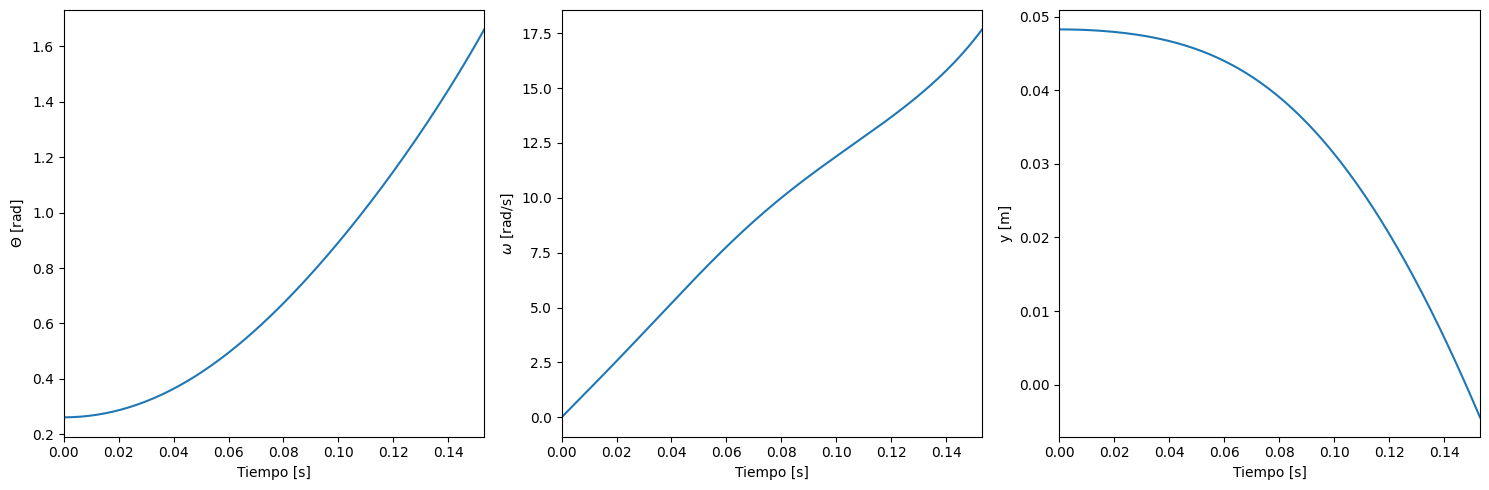

In [130]:
# Graficando los resultados
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = axs.flatten()

# Graficar theta
ax[0].plot(t, theta)
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel(r'$\Theta$ [rad]')
ax[0].set_xlim(t[0], t[-1])

# Graficar omega
ax[1].plot(t, omega)
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel(r'$\omega$ [rad/s]')
ax[1].set_xlim(t[0], t[-1])

# Graficar y (posición del centro de masa)
ax[2].plot(t, y)
ax[2].set_xlabel('Tiempo [s]')
ax[2].set_ylabel('y [m]')
ax[2].set_xlim(t[0], t[-1])

plt.tight_layout()
plt.show()

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?


  Sobre la posiciónangular se puede decir que a medida que el tiempo avanza, el ángulo $\theta$ aumenta, comenzando en $\theta_0$ =pi/12 y tendiendo hacia $\theta$ = pi/2 cuando el lápiz está completamente horizontal.La solución es válida desde el tiempo inicial t = 0 hasta el momento en que $\theta$ alcanza pi / 2. A partir de este punto, la simulación debe detenerse, ya que físicamente el lápiz no puede seguir cayendo más allá de este ángulo.


   La posición $y$ del centro de masa, dado por $y = \frac{l}{2}\cos \theta$, disminuye a medida que $\theta$ aumenta, debido a la inclinación del lápiz. El valor de $y$ es mayor al inicio cuendo $\theta$  es pequeño y disminuye hasta cero cuando $\theta = \pi/2$. La solución es válida siempre y cuando $y$ siga siendo una función continua y físicamente correcta.



La velocidad angular $\omega$ comienza en cero y aumenta a medida que el lápiz cae, es decir, su maximo cuamdo el lápiz está cerca de la horizontal. La validez de $\omega$ debe evaluarse observando si el valor de $\omega$ se comporta de manera esperada (incrementa de forma continua sin saltos abruptos)


4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

Ya sabemos hasta donde va el valor de $t$ pero para $\theta = \pi/12$

In [179]:
from scipy.interpolate import interp1d
from scipy.optimize import newton
import matplotlib.pyplot as plt

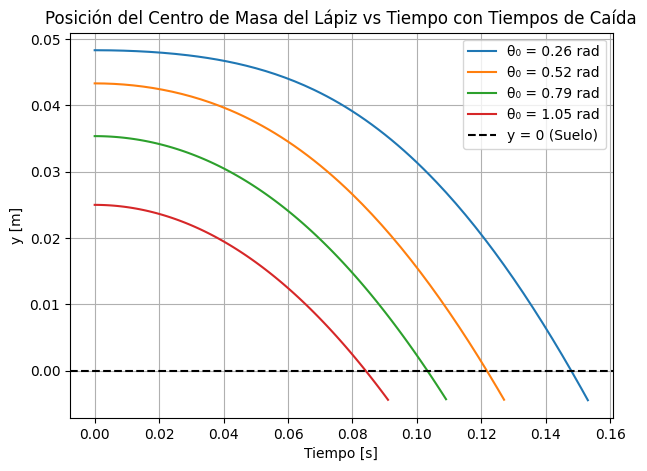

θ₀ = 0.26 rad, Tiempo de caída = 0.15 s
θ₀ = 0.52 rad, Tiempo de caída = 0.12 s
θ₀ = 0.79 rad, Tiempo de caída = 0.10 s
θ₀ = 1.05 rad, Tiempo de caída = 0.08 s


In [188]:
# Ángulos iniciales
theta0_values = [np.pi / 12, np.pi / 6, np.pi / 4, np.pi / 3]

ti = 0
tfin = 3 # parra ver donde llega la frafica

N = int((tfin - ti) / dt)
t = np.linspace(ti, tfin, N)

# Resultados de simulación
ti_ca = []
niv = [] # vou a guardar losd datos que se imprimen.

# Crear la figura para graficar
plt.figure(figsize=(7, 5))

for theta0 in theta0_values:
  # Condiciones iniciales
  cond_ini = [theta0, omega0]

  solu = odeint(fun, cond_ini, t, args=(g, L))
  theta = solu[:, 0]
  y = (L / 2) * np.cos(theta)


  for i in range(len(theta)):
    if theta[i] >= np.pi / 1.9:
      theta = theta[:i+1]
      y = y[:i+1]
      t = t[:i+1]
      break

  # Interpolación para y
  interp_func = interp1d(t, y, kind='linear', fill_value="extrapolate")

  # Encontrar el tiempo de caída usando el método de Newton-Raphson
  def target_function(t_val):
    return interp_func(t_val)

  tiempo_cai = newton(target_function, 1)  # Valor inicial aproximado

  # Guardar resultados
  ti_ca.append(tiempo_cai)
  niv.append(f'θ₀ = {theta0:.2f} rad, Tiempo de caída = {tiempo_cai:.2f} s')

  # Graficar los resultados
  plt.plot(t, y, label=f'θ₀ = {theta0:.2f} rad')

# Configurar la gráfica
plt.axhline(0, color='k', linestyle='--', label='y = 0 (Suelo)')
plt.title("Posición del Centro de Masa del Lápiz vs Tiempo con Tiempos de Caída")
plt.xlabel('Tiempo [s]')
plt.ylabel('y [m]')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir tiempos de caída
for label in niv:
  print(label)


6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

In [192]:
from scipy.integrate import quad

In [204]:
def integrando(theta, theta0, L, g):
  numerador = (1/3) + np.sin(theta)**2
  denominador = np.cos(theta0) - np.cos(theta)
  return np.sqrt(numerador / denominador)

# Ángulos iniciales
theta0_values = [np.pi / 12, np.pi / 6, np.pi / 4, np.pi / 3]
rango_values = np.linspace(np.pi/12, np.pi/2, 100)
T_int= []# tiemp. caid integral
# Calcular el tiempo de caída para cada ángulo inicial
for theta0 in theta0_values:
  # Calcular la integral
  integral_resul, _ = quad(integrando, theta0, np.pi / 2, args=(theta0, L, g)) # " _ " me ayuda a un solo vlor

  T = 0.5 * np.sqrt(L / g) * integral_resul
  T_int.append(T)

  print(f'Ángulo inicial: θ₀ = {theta0:.2f} rad')
  print(f'Tiempo de caída calculado: T = {T:.2f} s')

Ángulo inicial: θ₀ = 0.26 rad
Tiempo de caída calculado: T = 0.15 s
Ángulo inicial: θ₀ = 0.52 rad
Tiempo de caída calculado: T = 0.12 s
Ángulo inicial: θ₀ = 0.79 rad
Tiempo de caída calculado: T = 0.10 s
Ángulo inicial: θ₀ = 1.05 rad
Tiempo de caída calculado: T = 0.08 s


7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?

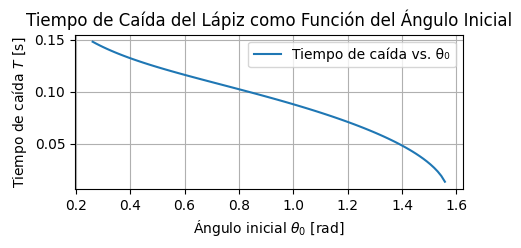

In [201]:
plt.figure(figsize=(5, 2))
plt.plot(theta0_values, times_of_fall, label='Tiempo de caída vs. θ₀')
plt.xlabel(r'Ángulo inicial $\theta_0$ [rad]')
plt.ylabel(r'Tiempo de caída $T$ [s]')
plt.title('Tiempo de Caída del Lápiz como Función del Ángulo Inicial')
plt.grid(True)
plt.legend()
plt.show()